## Importando bibliotecas e instalando componentes

In [3]:
!pip install seaborn    # --> Pular se já possuir a biblioteca instalada

     -------------------------------------- 292.8/292.8 kB 1.8 MB/s eta 0:00:00


ERROR: Could not find a version that satisfies the requirement pandas_datareader.data (from versions: none)
ERROR: No matching distribution found for pandas_datareader.data


In [ ]:
!pip install yfinance --upgrade --no-cache-dir    # --> Pular se já possuir a biblioteca instalada

In [3]:
import seaborn as sns             # Gráficos
import matplotlib.pyplot as plt   # Gráficos
import pandas as pd               # Cria e realiza as operações de DataFrames
import numpy as np                # Módulo padrão no ramo estatístico
import pandas_datareader.data as web  

import yfinance as yf
yf.pdr_override()

In [73]:
tickets = ["META", "TSLA", "AMZN", "USDT-USD", "ETH-USD", "BTC-USD", "GOOGL-USD"]
dfs = []

for df in tickets:
    ticket = yf.Ticker(df)
    aux = ticket.history(interval="5d", start="2021-08-06", end="2022-08-06")
    aux.reset_index(inplace=True)
    aux["ticket"] = df
    aux["rentabilidade"] = aux['Close']/aux['Close'].shift() *100 - 100
    dfs.append(aux)

In [74]:
correlacao = pd.DataFrame()
for df in dfs:
    correlacao[df["ticket"].iloc[0]] = df['rentabilidade']
correlacao.head()

,META,TSLA,AMZN,USDT-USD,ETH-USD,BTC-USD,GOOGL-USD
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.976594,1.247323,-1.579397,0.015301,9.453787,6.486137,0.364664
2,1.833539,-3.058691,0.208981,-0.009698,-0.244469,0.901107,1.629543
3,-0.594716,2.184588,0.515618,0.027192,2.204158,6.305924,-0.906435
4,4.116582,4.928975,4.667975,-0.027982,-3.898180,-4.014423,2.988338


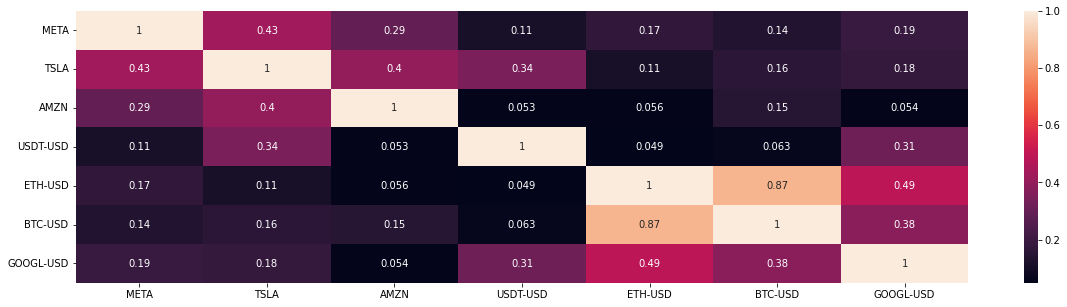

In [75]:
ax, fig = plt.subplots(figsize=(20,5))
ax = sns.heatmap(correlacao.corr(), annot=True)

## Separando em períodos - Anos

In [15]:
tickets = ["META", "TSLA", "AMZN", "USDT-USD", "ETH-USD", "BTC-USD"]
dfs = []

for df in tickets:
    ticket = yf.Ticker(df)
    aux = ticket.history(interval="1mo", start="2018-08-06", end="2022-08-06")
    aux["month"] = aux.index.month
    aux["year"] = aux.index.year
    aux["day"] = aux.index.day
    aux["ticket"] = df
    aux["rentabilidade"] = aux['Close']/aux['Close'].shift() *100 - 100
    aux.reset_index(inplace=True)
    dfs.append(aux)

In [16]:
dfs_anos = [[] for i in range(dfs[0]["year"].max()+1 - dfs[0]["year"].min())]
c = 0

for year in range(dfs[0]["year"].min(), (dfs[0]["year"].max())+1):
    for df in dfs:
        aux = df.loc[:, ["rentabilidade", "year", "month"]].where(df["year"] == year).dropna()
        aux["ticket"] = df["ticket"][0]
        dfs_anos[c].append(aux)
    c+=1

In [250]:
dfs_anos[0][-3]

,rentabilidade,year,month,ticket
1,0.889160,2018.0,8.0,USDT-USD
2,-0.854586,2018.0,8.0,USDT-USD
3,-0.051936,2018.0,8.0,USDT-USD
4,-0.147198,2018.0,8.0,USDT-USD
5,0.428632,2018.0,8.0,USDT-USD
6,0.442442,2018.0,9.0,USDT-USD
7,-0.661739,2018.0,9.0,USDT-USD
8,-0.041944,2018.0,9.0,USDT-USD
9,0.067939,2018.0,9.0,USDT-USD
10,-0.109825,2018.0,9.0,USDT-USD


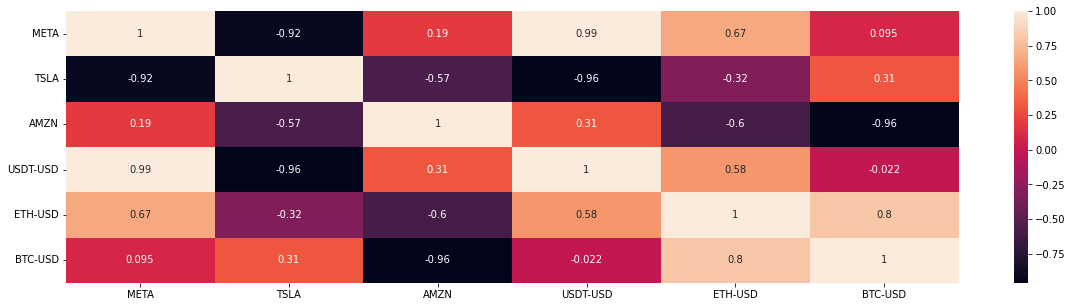

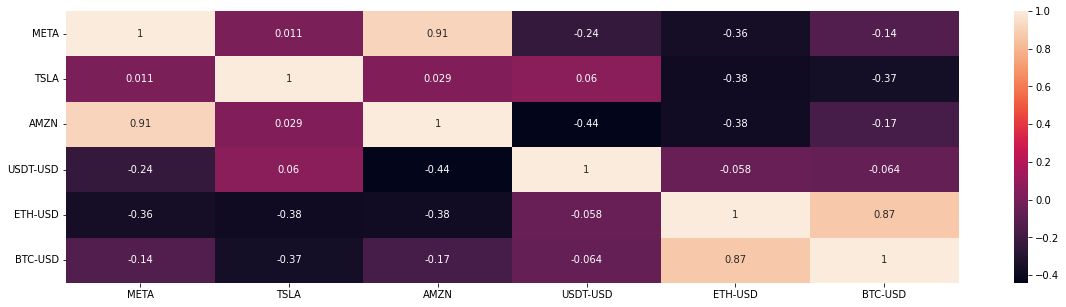

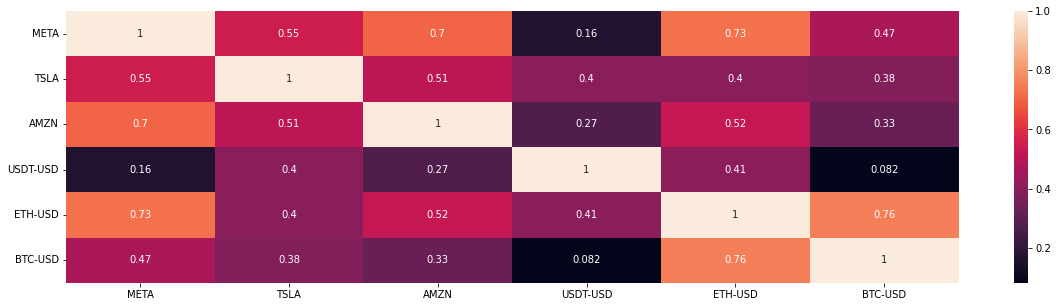

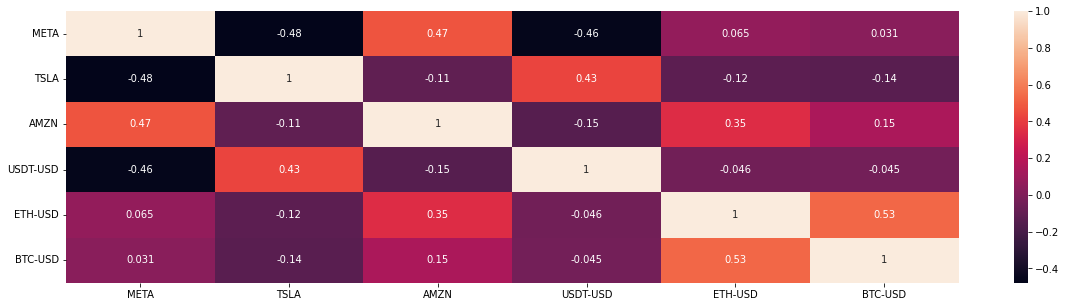

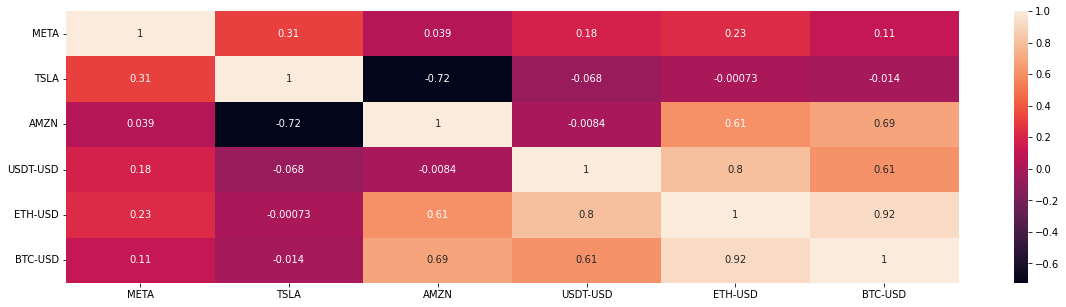

In [18]:
for row in dfs_anos:
    correlacao = pd.DataFrame()
    for df in row:
        correlacao[df["ticket"].iloc[0]] = df['rentabilidade']
    ax, fig = plt.subplots(figsize=(20,5))
    ax = sns.heatmap(correlacao.corr(), annot=True)

In [ ]:
# Fazer candlestick!!

## Separando em períodos - Trimestres

In [197]:
tickets = ["META", "TSLA", "AMZN", "USDT-USD", "ETH-USD", "BTC-USD", "GOOGL-USD"]
dfs = []

for df in tickets:
    ticket = yf.Ticker(df)
    aux = ticket.history(interval="1d", start="2021-07-30", end="2022-07-30")
    aux["month"] = aux.index.month
    aux["year"] = aux.index.year
    aux["day"] = aux.index.day
    aux["ticket"] = df
    aux["rentabilidade"] = aux['Close']/aux['Close'].shift() *100 - 100
    aux.reset_index(inplace=True)
    dfs.append(aux)

In [198]:
num_trimestres = (dfs[0]["year"].max() - dfs[0]["year"].min())*12
dfs_meses = [[] for i in range(len(dfs))]
c = 0

for df in dfs: # Colocar um for pro year!!
    for i in range(1, num_trimestres+1,3):
        aux = pd.DataFrame()
        aux["rentabilidade"] = df["rentabilidade"].where(df["month"] <=i).dropna()
        aux["mes"] = df["month"].where(df["month"] <=i).dropna()
        aux["ticket"] = df["ticket"][0]
        dfs_meses[c].append(aux)
    c+=1
dfs_meses

[[     rentabilidade  mes ticket
  108       0.651108  1.0   META
  109      -0.593729  1.0   META
  110      -3.672774  1.0   META
  111       2.557293  1.0   META
  112      -0.201523  1.0   META
  113      -1.121191  1.0   META
  114       1.920318  1.0   META
  115      -0.331963  1.0   META
  116      -2.034447  1.0   META
  117       1.660127  1.0   META
  118      -4.142814  1.0   META
  119       0.452617  1.0   META
  120      -0.948089  1.0   META
  121      -4.229841  1.0   META
  122       1.827350  1.0   META
  123      -2.772828  1.0   META
  124      -1.839077  1.0   META
  125       0.003397  1.0   META
  126       2.399530  1.0   META
  127       3.828186  1.0   META,
       rentabilidade  mes ticket
  108       0.651108  1.0   META
  109      -0.593729  1.0   META
  110      -3.672774  1.0   META
  111       2.557293  1.0   META
  112      -0.201523  1.0   META
  ..             ...  ...    ...
  185       1.564285  4.0   META
  186      -3.230124  4.0   META
  187    

In [199]:
conj_meses = [[] for row in range(len(dfs_meses[0]))]

for i in range(len(dfs_meses[0])):
    for c in range(len(dfs_meses)):
        conj_meses[i].append(dfs_meses[c][i])
conj_meses

[[     rentabilidade  mes ticket
  108       0.651108  1.0   META
  109      -0.593729  1.0   META
  110      -3.672774  1.0   META
  111       2.557293  1.0   META
  112      -0.201523  1.0   META
  113      -1.121191  1.0   META
  114       1.920318  1.0   META
  115      -0.331963  1.0   META
  116      -2.034447  1.0   META
  117       1.660127  1.0   META
  118      -4.142814  1.0   META
  119       0.452617  1.0   META
  120      -0.948089  1.0   META
  121      -4.229841  1.0   META
  122       1.827350  1.0   META
  123      -2.772828  1.0   META
  124      -1.839077  1.0   META
  125       0.003397  1.0   META
  126       2.399530  1.0   META
  127       3.828186  1.0   META,
       rentabilidade  mes ticket
  108      13.531671  1.0   TSLA
  109      -4.183272  1.0   TSLA
  110      -5.347121  1.0   TSLA
  111      -2.152340  1.0   TSLA
  112      -3.544660  1.0   TSLA
  113       3.034201  1.0   TSLA
  114       0.593508  1.0   TSLA
  115       3.928969  1.0   TSLA
  116    

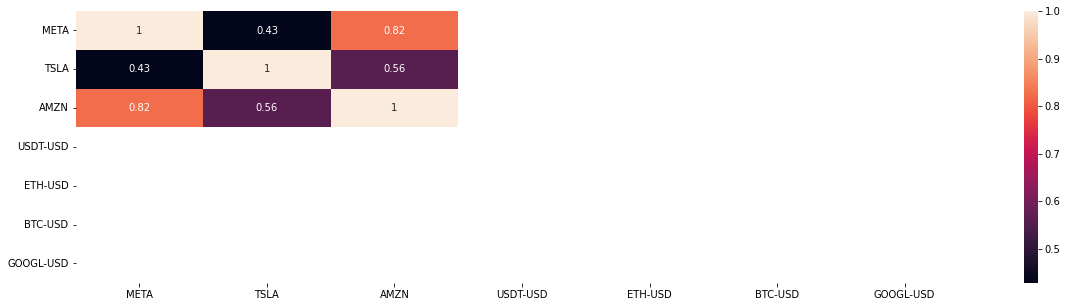

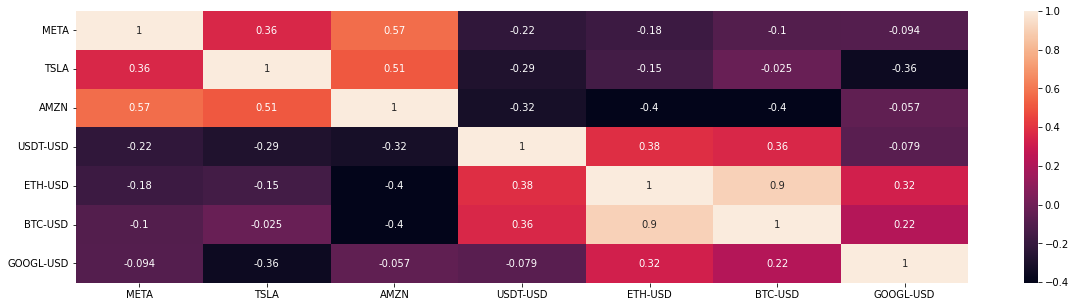

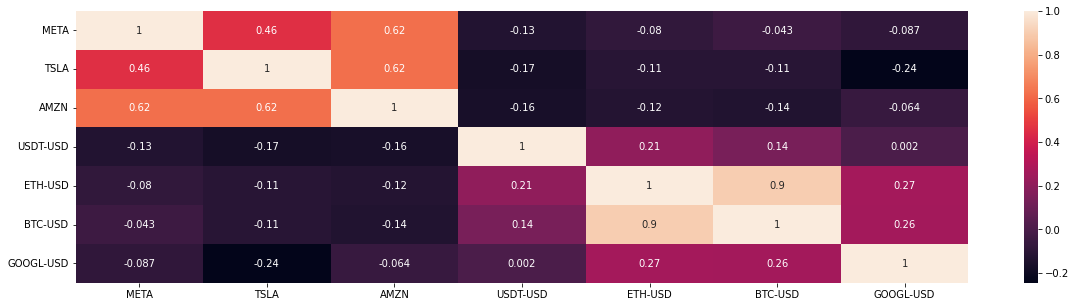

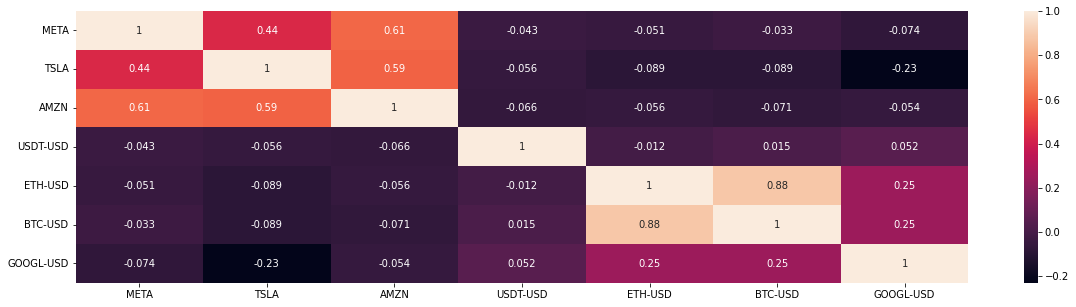

In [200]:
for row in conj_meses:
    correlacao = pd.DataFrame()
    for df in row:
        correlacao[df["ticket"].iloc[0]] = df['rentabilidade']
    ax, fig = plt.subplots(figsize=(20,5))
    ax = sns.heatmap(correlacao.corr(), annot=True)